In [ ]:
# Import the pandas library
import pandas as pd
# Read the Indian data CSV file into a data frame
df = pd.read_csv(r'/content/sample_data/Indian_data.csv',engine='python')

In [ ]:
# Print the first 5 rows of the first data frame
print(df.head())

        City        Date   PM2.5  PM10     NO    NO2    NOx  NH3     CO  \
0  Ahmedabad  29/01/2015   83.13   NaN   6.93  28.71  33.72  NaN   6.93   
1  Ahmedabad  30/01/2015   79.84   NaN  13.85  28.68  41.08  NaN  13.85   
2  Ahmedabad  31/01/2015   94.52   NaN  24.39  32.66  52.61  NaN  24.39   
3  Ahmedabad  01/02/2015  135.99   NaN  43.48  42.08  84.57  NaN  43.48   
4  Ahmedabad  02/02/2015  178.33   NaN  54.56  35.31  72.80  NaN  54.56   

     SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  49.52   59.76     0.02     0.00    3.14  209       Poor  
1  48.49   97.07     0.04     0.00    4.81  328  Very Poor  
2  67.39  111.33     0.24     0.01    7.67  514     Severe  
3  75.23  102.70     0.40     0.04   25.87  782     Severe  
4  55.04  107.38     0.46     0.06   35.61  914     Severe  


In [ ]:

num_rows, num_cols = df.shape
summary=df.describe
info = df.info()
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')
#print(summary)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        24850 non-null  object 
 1   Date        24850 non-null  object 
 2   PM2.5       24172 non-null  float64
 3   PM10        17764 non-null  float64
 4   NO          24463 non-null  float64
 5   NO2         24459 non-null  float64
 6   NOx         22993 non-null  float64
 7   NH3         18314 non-null  float64
 8   CO          24405 non-null  float64
 9   SO2         24245 non-null  float64
 10  O3          24043 non-null  float64
 11  Benzene     21315 non-null  float64
 12  Toluene     19024 non-null  float64
 13  Xylene      9478 non-null   float64
 14  AQI         24850 non-null  int64  
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(12), int64(1), object(3)
memory usage: 3.0+ MB
The DataFrame has 24850 rows and 16 columns.
None


In [ ]:
df.drop(columns=['NO', 'NOx','NH3','SO2','Benzene','Toluene','Xylene','AQI_Bucket'],axis=1, inplace=True)

In [ ]:
num_rows, num_cols = df.shape
summary=df.describe
info = df.info()
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')
#print(summary)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    24850 non-null  object 
 1   Date    24850 non-null  object 
 2   PM2.5   24172 non-null  float64
 3   PM10    17764 non-null  float64
 4   NO2     24459 non-null  float64
 5   CO      24405 non-null  float64
 6   O3      24043 non-null  float64
 7   AQI     24850 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB
The DataFrame has 24850 rows and 8 columns.
None


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.strftime('%Y')

<ipython-input-6-4ab4ab2a2969>:1: UserWarning: Parsing '29/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-6-4ab4ab2a2969>:1: UserWarning: Parsing '30/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-6-4ab4ab2a2969>:1: UserWarning: Parsing '31/01/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-6-4ab4ab2a2969>:1: UserWarning: Parsing '13/02/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])
<ipython-input-6-4ab4ab2a2969>:1: UserWarning: Parsing '14/02/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsin

In [ ]:
df.drop(columns=['Date'],axis=1, inplace=True)


In [ ]:
print(df.head())

        City   PM2.5  PM10    NO2     CO      O3  AQI  Year
0  Ahmedabad   83.13   NaN  28.71   6.93   59.76  209  2015
1  Ahmedabad   79.84   NaN  28.68  13.85   97.07  328  2015
2  Ahmedabad   94.52   NaN  32.66  24.39  111.33  514  2015
3  Ahmedabad  135.99   NaN  42.08  43.48  102.70  782  2015
4  Ahmedabad  178.33   NaN  35.31  54.56  107.38  914  2015


In [ ]:
print(df.isnull().sum())

City        0
PM2.5     678
PM10     7086
NO2       391
CO        445
O3        807
AQI         0
Year        0
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer
import pandas as pd

# create a KNNImputer object and set the number of nearest neighbors (K) to use
imputer = KNNImputer(n_neighbors=5)

# select the columns with missing values in your dataframe
cols_with_missing = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']

# apply the imputation to the selected columns and store the result in a new dataframe
df_imputed = pd.DataFrame(imputer.fit_transform(df[cols_with_missing]))

# rename the columns of the imputed dataframe to match the original dataframe
df_imputed.columns = cols_with_missing

# replace the missing values in the original dataframe with the imputed values
df[cols_with_missing] = df_imputed

In [ ]:
print(df.isnull().sum())

City     0
PM2.5    0
PM10     0
NO2      0
CO       0
O3       0
AQI      0
Year     0
dtype: int64


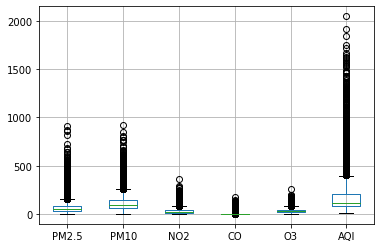

In [ ]:
import matplotlib.pyplot as plt

df.boxplot(column=['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'AQI'])
plt.show()

In [ ]:

# drop rows where AQI > 500
df = df.loc[df['AQI'] <= 500]

mean_CO = df['CO'].mean()
df['CO'] = df['CO'].apply(lambda x: mean_CO if x == 0 else x)

In [ ]:
# find the minimum value of each column
min_values = df.min()
print('Minimum Values:\n', min_values)

# find the maximum value of each column
max_values = df.max()
print('Maximum Values:\n', max_values)

Minimum Values:
 City     Ahmedabad
PM2.5         0.04
PM10          0.03
NO2           0.01
CO            0.01
O3            0.01
AQI             13
Year          2015
dtype: object
Maximum Values:
 City     Visakhapatnam
PM2.5           868.66
PM10            847.41
NO2             362.21
CO              175.81
O3              200.41
AQI                500
Year              2020
dtype: object


In [ ]:
df.to_excel('d.xlsx')

In [ ]:
Indian_df=df

In [ ]:
# Read the Indian data CSV file into a data frame
df = pd.read_csv(r'/content/sample_data/US_data.csv',engine='python')

In [ ]:
num_rows, num_cols = df.shape
summary=df.describe
info = df.info()
print(f'The DataFrame has {num_rows} rows and {num_cols} columns.')
#print(summary)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6145 entries, 0 to 6144
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    6145 non-null   object
 1   Year    6145 non-null   int64 
 2   AQI     6145 non-null   int64 
 3   CO      6145 non-null   int64 
 4   NO2     6145 non-null   int64 
 5   O3      6145 non-null   int64 
 6   PM2.5   6145 non-null   int64 
 7   PM10    6145 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 384.2+ KB
The DataFrame has 6145 rows and 8 columns.
None


In [ ]:
print(df.isnull().sum())

City     0
Year     0
AQI      0
CO       0
NO2      0
O3       0
PM2.5    0
PM10     0
dtype: int64


In [ ]:
# find the minimum value of each column
min_values = df.min()
print('Minimum Values:\n', min_values)

# find the maximum value of each column
max_values = df.max()
print('Maximum Values:\n', max_values)

Minimum Values:
 City     Alabama
Year        2015
AQI            2
CO             0
NO2            0
O3             0
PM2.5          0
PM10           0
dtype: object
Maximum Values:
 City     Wyoming
Year        2020
AQI          366
CO           328
NO2          365
O3           366
PM2.5        366
PM10         366
dtype: object


In [ ]:
Us_df=df

In [ ]:
Us_df

,City,Year,AQI,CO,NO2,O3,PM2.5,PM10
0,Alabama,2015,264,0,0,189,75,0
1,Alabama,2015,112,0,0,0,112,0
2,Alabama,2015,280,0,0,195,85,0
3,Alabama,2015,363,0,0,307,56,0
4,Alabama,2015,233,0,0,233,0,0
...,...,...,...,...,...,...,...,...
6140,Wyoming,2020,366,0,0,355,11,0
6141,Wyoming,2020,366,0,5,253,7,101
6142,Wyoming,2020,366,0,0,329,37,0
6143,Wyoming,2020,366,0,2,225,0,139


In [ ]:
Us_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6145 entries, 0 to 6144
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    6145 non-null   object
 1   Year    6145 non-null   int64 
 2   AQI     6145 non-null   int64 
 3   CO      6145 non-null   int64 
 4   NO2     6145 non-null   int64 
 5   O3      6145 non-null   int64 
 6   PM2.5   6145 non-null   int64 
 7   PM10    6145 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 384.2+ KB


In [ ]:
Indian_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24307 entries, 0 to 24849
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    24307 non-null  object 
 1   PM2.5   24307 non-null  float64
 2   PM10    24307 non-null  float64
 3   NO2     24307 non-null  float64
 4   CO      24307 non-null  float64
 5   O3      24307 non-null  float64
 6   AQI     24307 non-null  int64  
 7   Year    24307 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:


Us_df = Us_df.astype({'CO': 'float', 'NO2': 'float','O3': 'float','PM2.5': 'float','PM10': 'float'})

In [ ]:
Indian_df['Year'] = Indian_df['Year'].astype(int)
Us_df['Year'] = Us_df['Year'].astype(int)

In [ ]:
Main_df = pd.merge(Indian_df, Us_df, on=['City', 'Year', 'AQI', 'CO', 'NO2', 'O3', 'PM2.5', 'PM10'], how='outer')


In [ ]:
Main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30452 entries, 0 to 30451
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    30452 non-null  object 
 1   PM2.5   30452 non-null  float64
 2   PM10    30452 non-null  float64
 3   NO2     30452 non-null  float64
 4   CO      30452 non-null  float64
 5   O3      30452 non-null  float64
 6   AQI     30452 non-null  int64  
 7   Year    30452 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 2.1+ MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Split the data into training and testing sets
X = Main_df.drop(['AQI'], axis=1)
y = Main_df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the features and target variable
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
X_train = X_train[features]
X_test = X_test[features]

# Step 3: Create a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Fit the model
rf_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf_model.predict(X_test)



In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  17.26196852363556


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# calculate correlation coefficient
corr = np.corrcoef(y_test, y_pred)[0, 1]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Correlation coefficient: ', corr)
print('Root Mean Squared Error: ', rmse)

Correlation coefficient:  0.9639599884681562
Root Mean Squared Error:  31.217133350086172


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2_percentage = round(r2 * 100, 2)
print("R-squared: ", r2_percentage, "%")

R-squared:  92.92 %


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Step 1: Split the data into training and testing sets
X = Main_df.drop(['AQI'], axis=1)
y = Main_df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the features and target variable
features = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']
X_train = X_train[features]
X_test = X_test[features]

# Step 3: Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Create a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 5: Fit the model
rf_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions
y_pred = rf_model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)
from sklearn.metrics import mean_squared_error
import numpy as np
# calculate correlation coefficient
corr = np.corrcoef(y_test, y_pred)[0, 1]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Correlation coefficient: ', corr)
print('Root Mean Squared Error: ', rmse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2_percentage = round(r2 * 100, 2)
print("R-squared: ", r2_percentage, "%")

Mean Absolute Error:  17.254706990225607
Correlation coefficient:  0.9639942923716993
Root Mean Squared Error:  31.202686244595192
R-squared:  92.92 %


In [ ]:
Main_df.to_csv('Main.csv')